# Ejercicios sobre suavizado mediante Kernel

Jessenia Piza, Sebastián Martínez y Manuela Acosta

1. Para el dataset de `wage` (salario), y usando como variable independiente `age`. Realice procesos de suavizado involucrando kernels (pruebe con los tres kernels vistos) y también realice una regresión local usando el kernel de epanechinov.  Para este ejercicio no es necesario usar la división de training y test.


In [1]:
# Cargamos las librerias

import numpy as np

import warnings

from numpy.linalg import inv, pinv

from numpy.random import uniform
from numpy.random import normal

import pandas as pd

from scipy.stats import norm

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("wage.csv")
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
#Determinando X y Y
X = df['age']
Y = df['wage']

In [4]:
#Promedio de salarios por edad, para evitar datos repetidos 
edades = X.unique()
promedios = []
for i in edades:
    salario = 0
    cantidad = 0
    for n in range(len(X)):
        if X[n] == i:
            salario += Y[n]
            cantidad += 1
    promedio = salario/cantidad
    promedios.append(promedio)

X = edades
Y = np.array(promedios)

In [5]:
#Ordenando los datos 
X_ = np.argsort(X)
X = X[X_]
Y = Y[X_]

In [6]:
#Kernels suavizados 
y_hat_30_nearest = np.zeros(len(Y))
y_hat_02_epa = np.zeros(len(Y))
y_hat_02_tri = np.zeros(len(Y))


for i in range(len(X)):
    x0 = X[i]
    y_hat_30_nearest[i] = np.mean(Y[np.argsort(np.abs(X - x0))][:30])
    
    t = np.abs(X - x0)/0.02
    d = (t<=1)*3/4*(1-t**2) # kernel de Epanechnikov 
    d3 = (t<=1)*(1-t**3)**3 # kernel tricubico
    
    # Ponderacion mediante kernel Nadaraya-Watson
    y_hat_02_epa[i] = np.sum(d*Y)/np.sum(d)
    y_hat_02_tri[i] = np.sum(d3*Y)/np.sum(d3)

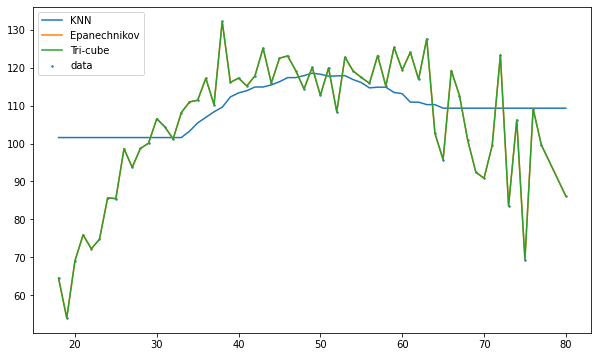

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, s=2, label='data')
plt.plot(X, y_hat_30_nearest, label='KNN')
plt.plot(X, y_hat_02_epa, label='Epanechnikov')
plt.plot(X, y_hat_02_tri, label='Tri-cube')
plt.legend();

In [8]:
X = df.iloc[:,:11]
Y = df['wage']
X = pd.get_dummies(X)

In [9]:
X = X.values
Y = Y.values

In [10]:
#Regresión local usando un kernel de Epanechnikov
y_hat_lin = np.zeros(Y.shape)
y_hat_sqr = np.zeros(Y.shape)

B = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
B2 = np.hstack((np.ones(shape=(X.shape[0], 1)), X, X**2))

for i in range(X.shape[0]):
    x0 = X[i]
    
    t = np.sqrt(np.sum((B - np.concatenate(([1], x0)))**2, axis = 1))/0.2
#     t = np.(B - np.concatenate(([1], x0)))/0.2
    d = (t<=1)*3/4*(1-t**2) # Epa kernel
    Wx0 = np.diag(d)
    
    y_hat_lin[i] = np.array(np.concatenate(([1], x0))) @ pinv(B.T @ Wx0 @ B) @ B.T @ Wx0 @ np.expand_dims(Y, axis=1)
    y_hat_sqr[i] = np.array(np.concatenate(([1], x0,x0**2))) @ pinv(B2.T @ Wx0 @ B2) @ B2.T @ Wx0 @ np.expand_dims(Y, axis=1)

In [29]:
y_hat_lin # Regresión lineal

array([ 75.04315402,  70.47601965, 130.98217738, ...,  66.22940829,
        87.98103279,  90.48191336])

In [30]:
y_hat_sqr # Regresión Cuadrática

array([ 75.04315402,  70.47601965, 130.98217738, ...,  66.22940829,
        87.98103279,  90.48191336])

2. Cree una nueva clase binaria, en donde una clase corresponda a los salarios mayores a 250 y la otra a los menores. Realice una clasificación usando el clasificador de Naive Bayes. Pruebe el resultado con un Test set y con la métrica de acuracy y la matriz de confusión.

In [34]:
#Creando clase binaria 
X = df.iloc[:,:11]
X = pd.get_dummies(X)
y = df['wage'].copy()
for i in range(len(wage2)):
    if y[i] >= 250:
        y[i] = 1
    else: 
        y[i] = 0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [37]:
print("La exactitud (accuracy) de clasificación con el clasificador de NB es:", clf.score(X_test, y_test))

La exactitud (accuracy) de clasificación con el clasificador de NB es: 0.9973333333333333


In [39]:
y.value_counts()/(df.shape[0])

0.0    0.973667
1.0    0.026333
Name: wage, dtype: float64

Podemos concluir que la clasificación es muy buena y que el 97.36% de los salarios son menores a 250.